## Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

In [3]:
# Factors that can increase your risk of chronic kidney disease include:
    # Diabetes
    # High blood pressure
    # Heart (cardiovascular) disease
    # Smoking
    # Obesity
    # Being Black, Native American or Asian American --> How?
    # Family history of kidney disease
    # Abnormal kidney structure
    # Older age
    # Frequent use of medications that can damage the kidneys

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [5]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

In [6]:
data = pd.read_csv('chronic_kidney_disease_full.csv')

In [7]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [8]:
data.shape

(400, 25)

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

In [10]:
# Answer here:

# Age and Health: Check how age affects conditions like hypertension (high blood pressure), diabetes, and heart disease.

# Blood Pressure Factors: Look at how blood pressure relates to sodium and potassium levels.

# Blood Glucose and Diabetes: Explore how blood glucose levels connect to diabetes.

# Anemia and Hemoglobin: Analyze the link between hemoglobin levels and anemia.

# Kidney Health: Assess how albumin and sugar levels relate to kidney function indicators like blood urea and creatinine.

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [12]:
# Answer here:
print(data.dtypes.to_frame(name='Data Type').join(data.isna().sum().rename('Null Count')))

      Data Type  Null Count
age     float64           9
bp      float64          12
sg      float64          47
al      float64          46
su      float64          49
rbc      object         152
pc       object          65
pcc      object           4
ba       object           4
bgr     float64          44
bu      float64          19
sc      float64          17
sod     float64          87
pot     float64          88
hemo    float64          52
pcv     float64          71
wbcc    float64         106
rbcc    float64         131
htn      object           2
dm       object           2
cad      object           2
appet    object           1
pe       object           1
ane      object           1
class    object           0


In [13]:
# Make it easier by making the missing output in %
print (data.dtypes.to_frame(name='Data Type').join(data.isna().mean().mul(100)
      .rename('%Null')).sort_values(by = '%Null', ascending = False))

      Data Type  %Null
rbc      object  38.00
rbcc    float64  32.75
wbcc    float64  26.50
pot     float64  22.00
sod     float64  21.75
pcv     float64  17.75
pc       object  16.25
hemo    float64  13.00
su      float64  12.25
sg      float64  11.75
al      float64  11.50
bgr     float64  11.00
bu      float64   4.75
sc      float64   4.25
bp      float64   3.00
age     float64   2.25
ba       object   1.00
pcc      object   1.00
htn      object   0.50
dm       object   0.50
cad      object   0.50
appet    object   0.25
pe       object   0.25
ane      object   0.25
class    object   0.00


### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [15]:
# Answer here:
# Dropping rows with any missing values
complete_cases = data.dropna()
remaining_rows = complete_cases.shape[0]
print(f"Number of rows remaining after dropping missing values: {remaining_rows}")

# Downsides of Complete Case Analysis 
#    1. Loss a lot of data. After removing missing values, the dataset shows it only have 158 rows left from original data (400). 
#       It means that we may losing valueable data (In this case, roughly 60% of data).
#    2. Will end up with bias if the missing data isn't random.

Number of rows remaining after dropping missing values: 158


### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

In [17]:
# Answer here:

# 1. Not updated the patient health and conditon. 
# 2. Patients not consistently revisit for the follow-up appointments. This may not capture over time.
# 3. Some patients may have limited access to healthcare services, affecting their diagnosis and the quality of care they receive.

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

In [19]:
# Answer here:
# Create a model that classifies everyone as having chronic kidney disease (CKD).
# Then the only type of error to this model would be false positive (FP), 
# meaning it would falsely label patient is healthy BUT having CKD (false positives).

### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

In [21]:
# Answer here
# Optimize sensitivity (recall).
# Focused on minimize false negatives (FN).
# By classifying everyone having CKD BUT actually they have not.

### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

In [23]:
# Answer here:
# If the patients were told that they having CKD BUT they are not, will make the patient fear and panic. 
# Plus, the patients may go through the treatement and that may impact to thier health directly,
# including paying unnecessary treatment fees.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

In [25]:
# Answer here:
# Create a model that classifies everyone as not having chronic kidney disease (NOTCKD).
# Then the only type of error to this model would be false negative (FN), 
# meaning it fails to identify that the patients who actually have CKD, incorrectly labeling as NOT CKD.

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

In [27]:
# Answer here:
# Should optimize for specificity (or true negative)
# Focused on minimize False Negatives(FN)
# By classifying everyone not having CKD BUT actually they have.

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

In [29]:
# Answer here:
# The patients will miss chance to get a treatment and that will worsen their health.
# Plus, once patients getting worse it may hard to cure or provice the treatment to them which lead to choose dead-alive positions.

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [31]:
# Clean First

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [33]:
# Checking NULL again before handling with missing value
print (data.dtypes.to_frame(name='Data Type').join(data.isna().mean().mul(100)
      .rename('%Null')).sort_values(by = '%Null', ascending = False))

      Data Type  %Null
rbc      object  38.00
rbcc    float64  32.75
wbcc    float64  26.50
pot     float64  22.00
sod     float64  21.75
pcv     float64  17.75
pc       object  16.25
hemo    float64  13.00
su      float64  12.25
sg      float64  11.75
al      float64  11.50
bgr     float64  11.00
bu      float64   4.75
sc      float64   4.25
bp      float64   3.00
age     float64   2.25
ba       object   1.00
pcc      object   1.00
htn      object   0.50
dm       object   0.50
cad      object   0.50
appet    object   0.25
pe       object   0.25
ane      object   0.25
class    object   0.00


In [34]:
# Deal with 'object' first, as this dtypes cannot use for model prediciton
#rbc      object  38.00   red blood cells
#pc       object  16.25   pus cell
#ba       object   1.00   bacteria
#pcc      object   1.00   pus cell clumps
#htn      object   0.50   hypertension
#dm       object   0.50   diabetes mellitus
#cad      object   0.50   coronary artery disease
#appet    object   0.25   appetite
#pe       object   0.25   pedal edema
#ane      object   0.25   anemia

In [35]:
# Get unique value in 'object' data type. 
# This help to understand about the data more.

# Select columns with object data type
object_columns = data.select_dtypes(include='object')

# Display unique values for each object column
for col in object_columns.columns:
    unique_values = data[col].unique()
    print(f"Unique values in '{col}': {unique_values}\n")

Unique values in 'rbc': [nan 'normal' 'abnormal']

Unique values in 'pc': ['normal' 'abnormal' nan]

Unique values in 'pcc': ['notpresent' 'present' nan]

Unique values in 'ba': ['notpresent' 'present' nan]

Unique values in 'htn': ['yes' 'no' nan]

Unique values in 'dm': ['yes' 'no' nan]

Unique values in 'cad': ['no' 'yes' nan]

Unique values in 'appet': ['good' 'poor' nan]

Unique values in 'pe': ['no' 'yes' nan]

Unique values in 'ane': ['no' 'yes' nan]

Unique values in 'class': ['ckd' 'notckd']



In [36]:
# Binery 'rbc'& 'pc' 
# 'normal' = 1 // 'abnormal' = 2
data['rbc'] = data['rbc'].map({'normal': 1, 'abnormal': 0})
data['pc'] = data['pc'].map({'normal': 1, 'abnormal': 0})

In [37]:
# Binery 'htn','dm','cad','pe','ane'
# 'no' = 0 // 'yes' = 1
data['htn'] = data['htn'].map({'yes': 1, 'no': 0})
data['dm'] = data['dm'].map({'yes': 1, 'no': 0})
data['cad'] = data['cad'].map({'yes': 1, 'no': 0})
data['pe'] = data['pe'].map({'yes': 1, 'no': 0})
data['ane'] = data['ane'].map({'yes': 1, 'no': 0})

In [38]:
# Binery 'pcc'& 'ba' 
# 'notpresent' = 0 // 'present' = 1
data['pcc'] = data['pcc'].map({'present': 1, 'notpresent': 0})
data['ba'] = data['ba'].map({'present': 1, 'notpresent': 0})

In [39]:
# Binery 'class'
# 'ckd' = 1 // 'notckd' = 0
data['class'] = data['class'].map({'ckd': 1, 'notckd': 0})

In [40]:
# Create dummies for 'appet' column (dropping the first category to avoid multicollinearity)
appet_dummies = pd.get_dummies(data['appet'], prefix='appet', drop_first=True)

# Merge the dummies back to the original dataframe
data = pd.concat([data, appet_dummies], axis=1)  # appet with good value is our baseline

In [41]:
# Remind AGAIN 
# See the factors before drop.
# Factors that can increase your risk of chronic kidney disease include:
    # Diabetes
    # High blood pressure
    # Heart (cardiovascular) disease
    # Smoking
    # Obesity
    # Being Black, Native American or Asian American --> How?
    # Family history of kidney disease
    # Abnormal kidney structure
    # Older age
    # Frequent use of medications that can damage the kidneys

In [42]:
# List of columns to drop based on factors that can increase the risk of having CKD
# These columns contain % high of missing value rbc', 'rbcc', 'wbcc', 'pot', 'sod'
# No need to have it > Drop
data = data.drop(columns=['rbc', 'rbcc', 'wbcc', 'pot', 'sod','appet']) # for 'appet, I will use the dummy appet I made from above'

In [43]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'hemo', 'pcv', 'htn', 'dm', 'cad', 'pe', 'ane', 'class', 'appet_poor'],
      dtype='object')

In [44]:
# Fill N/A with mean
data = data.fillna(data.mean())

In [45]:
# Checking missing value again
data.isnull().sum()

age           0
bp            0
sg            0
al            0
su            0
pc            0
pcc           0
ba            0
bgr           0
bu            0
sc            0
hemo          0
pcv           0
htn           0
dm            0
cad           0
pe            0
ane           0
class         0
appet_poor    0
dtype: int64

In [46]:
data.shape

(400, 20)

In [47]:
# Run Logistic Regression Model

In [48]:
#Get list column of the rest excluding y (Target variables)
features = [c for c in data._get_numeric_data().columns if not c in ['class']] 

# Set up X, y
X = data[features]
y = data['class']


# Train/test splitting the data (Before scale to avoid data leak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating and fitting standard scaler 
ss = StandardScaler()
ss.fit(X_train);

#Transform
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

# Instantiating and fitting logistic regression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train);

y_preds = lr.predict(X_test_sc)

print (f'Training score: {lr.score(X_train_sc, y_train)}')
print (f'Testing score: {lr.score(X_test_sc, y_test)}')

Training score: 1.0
Testing score: 1.0


In [49]:
print(f'X_train_sc shape is: {X_train_sc.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test_sc shape is: {X_test_sc.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train_sc shape is: (320, 19)
y_train shape is: (320,)
X_test_sc shape is: (80, 19)
y_test shape is: (80,)


---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

age: -0.08764665956603461
bp: 0.48975044522070493
sg: -2.265055555022791
al: 1.1661056984540423
su: 0.5342363991096468
pc: -0.5036612702030815
pcc: 0.08110075681126248
ba: 0.07405694151208203
bgr: 0.8730047220245434
bu: 0.11599386894997601
sc: 0.8198490744632515
hemo: -1.5465379768643708
pcv: -1.156117198179752
htn: 0.7129123898784039
dm: 0.7439323549468878
cad: 0.03729605593536854
pe: 0.8459774675340616
ane: 0.06902677171991939
appet_poor: 1.0918070264014463


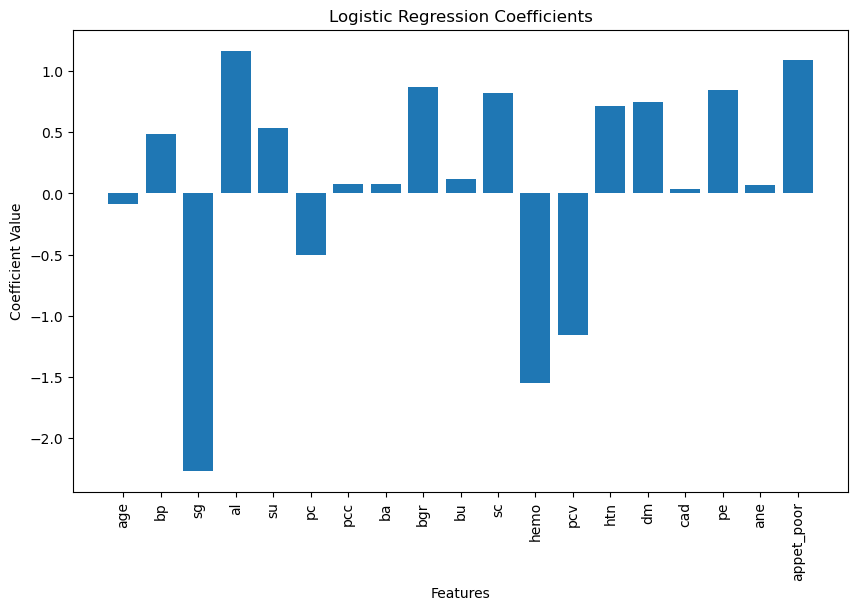

In [51]:
# Getting the coefficients from Q12
coefficients = lr.coef_[0]  # Coefficients for the model
feature_coef = list(zip(features, coefficients))

# Displaying the feature names and their coefficients
for feature, coef in feature_coef:
    print(f'{feature}: {coef}')

# Plot for easier visualization
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

In [123]:
# Ans:
# Interpret, hemo (-1.546):

# For patien who have lower hemoglobin levels are associated with a higher likelihood of chronic kidney disease.
# Each unit increase in hemoglobin, the log-odds of having CKD decreases by 1.556

# Odds Ratio 21.31% means that for every 1-unit increase in hemoglobin, the odds of having CKD are decrease to 21%.


# The coefficient from 'hemo'
coefficient = -1.546 # For hemo
# Calculate the odds ratio by exponentiating the coefficient
odds_ratio = np.exp(coefficient)*100

#Output
print(f'Odds Ratio: {round(odds_ratio, 2)}')

Odds Ratio: 21.31


### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [125]:
# Ans:
# Interpret,appet_poor (1.091) baseline is apet_good (drop earlier when create dummy): 

# For patients who have poor appetite has a positive association.
# Means that for those with poor appetite are more likely to have chronic kidney disease.

# The coefficient for 'appet_poor'
coefficient = 1.091

# Calculate the odds ratio by exponentiating the coefficient
odds_ratio = np.exp(coefficient)

# Calculate the percentage increase in odds
percentage_increase = (odds_ratio - 1) * 100

# Print the results
print(f"Odds Ratio: {round(odds_ratio, 2)}")
print(f"Percentage Increase in Odds: {round(percentage_increase, 2)}%")

Odds Ratio: 2.98
Percentage Increase in Odds: 197.72%


In [55]:
# For patients who have poor appetite are approximately 2.98 times more likely to have CKD compared to those who have good appetite
# The odds of having CKD increase by 198% if patients got poor appetite. 

# However, this is just mathametics matters. 
# To ensure wether patients will have CKD or not have to be tasted and consider other factors as well

### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:
1. Simple =  It is easy and efficient to predict if choosing the right feature
2. Predict probability = Logistic Regression help predict the probability and widely use

### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why?

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [59]:
# YES it does!
# Generating confusion maxtrix can help to explain how the prediction doing.

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
confusion_matrix

array([[28,  0],
       [ 0, 52]])

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

__Answer:__
Based on my confustion matrix, I don't worry much about optimizing sensitivity, specificity or any others. 
Because my confustion matrix shows from 100 patients in test data, no patient are incorrectly predicted.

However, in the real-world hospital case the sensitivity should be the priority. Missing on a patient got CKD can lead to hugh consequences.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

In [64]:
# Please let me skip this one

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

In [66]:
data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

__Answer:__

The unbalanced classes can be a problem. The models tend to be biased toword the majority class.
It may lead to poor predictions and result the inaccuracy scores which is critical and crucial to medical diagnoses like CKD. 

__But in this case...__
I don't think this can be a problem in this particular CKD analysis because the minority class or those not having CKD hold roughly 37% of the dataset. It doen't show very less proportion to be concerned about the unbalanced class issues.

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

__Answer:__

Actually, I would said peolple can have or not have CKD, depended on there behavior and health condition. The unbalance may shows that people tend to have CKD thesedays. However, I think it may predict the bias as when we want to know the probability, at least have the same sample size.

### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [71]:
# Set the random seed for reproducibility
np.random.seed(42)

#'class': 1 = CKD and 0 = non-CKD
# Identify no. of cases
ckd_cases = data[data['class'] == 1]

# Generate a random sample of size 200,000 from CKD cases (with replacement)
# Sample with replacement because...
# I want each CKD case be picked multiple times as in the dataset doesn’t have 200,000 unique CKD cases.
ckd_sample = ckd_cases.sample(n=200_000, replace=True)

# Combine the original dataset with the new CKD sample
df_unbalanced = pd.concat([data, ckd_sample], ignore_index=True)

# Check the distribution of the classes
class_counts = df_unbalanced['class'].value_counts(normalize=True) * 100
print("Class distribution in the new dataset (%):")
print(class_counts)

Class distribution in the new dataset (%):
class
1    99.92515
0     0.07485
Name: proportion, dtype: float64


In [72]:
df_unbalanced.shape

(200400, 20)

### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [138]:
# Set up X,y
X = df_unbalanced.drop(columns='class')  # Features
y = df_unbalanced['class']  # Target variable


# Train/test splitting the data (Before scale to avoid data leak)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiating and fitting standard scaler 
ss = StandardScaler()
ss.fit(X_train);

#Transform
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

# Instantiating and fitting logistic regression
lr = LogisticRegression()
lr.fit(X_train_sc, y_train);

y_preds = lr.predict(X_test_sc)

print (f'Training score: {lr.score(X_train_sc, y_train)}')
print (f'Testing score: {lr.score(X_test_sc, y_test)}')

Training score: 0.9999001996007985
Testing score: 0.9998003992015968


---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

In [140]:
# Ans
# Present the model's with 100% accuracy. Showing off the 0 FP and FN.
# The model will show that it has better outcomes and can use to predict and focus on patient health.

# Implementation
# Deploy > deploy model within the hospitals database to do the diagnostic. 
# Internal training > Train the staff to help them understand the meaning of model output. This help making decision!
# Monitor > After training and deploy, monitoring and maintain the accuracy of the models. 
    # It may have other factors building up causing CKD